In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
cd '/content/gdrive/My Drive/Visualization/Home B - 2014'

/content/gdrive/My Drive/Visualization/Home B - 2014


In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder as le
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics 
from scipy.spatial.distance import cdist

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Reading Datasets

In [0]:
weather = pd.read_csv(r'/content/gdrive/My Drive/Visualization/Home B - 2014/homeB2014.csv')

In [0]:
home = pd.read_csv(r'/content/gdrive/My Drive/Visualization/Home B - 2014/HomeB-meter1_2014.csv')

Merging Datasets

In [0]:
weather = weather.append(weather)
weather = weather.sort_values(by = "time")
weather = weather.reset_index()
whole_data = pd.merge(home,weather,left_index=True,right_index=True)

In [0]:
whole_data = whole_data.drop(['index'], axis =1 )

In [8]:
whole_data.shape

(17520, 32)

In [0]:
whole_data = whole_data.iloc[0:1000]  #reducing size of dataset to 1000 rows

In [10]:
whole_data.shape

(1000, 32)

Replacing NaN values


In [11]:
whole_data['cloudCover'].unique()

array([0.  , 0.04, 0.12,  nan, 0.19, 1.  , 0.05, 0.02, 0.26, 0.03, 0.34,
       0.07, 0.09, 0.75, 0.06, 0.1 , 0.22, 0.44, 0.28, 0.71, 0.53, 0.08,
       0.66, 0.48, 0.31, 0.33])

In [0]:
whole_data['cloudCover'] = whole_data['cloudCover'].fillna(whole_data['cloudCover'].mean())

label Encoding

In [0]:
col_cat = ['icon','summary']

In [0]:
for i in col_cat:
    lb=le()
    lb.fit(whole_data[i])
    temp=lb.transform(whole_data[i])
    whole_data[i]=temp

In [0]:
dataset = whole_data.drop(['Date & Time'], axis =1 )

In [0]:
dataset.to_csv(r'/content/gdrive/My Drive/Visualization/Home B - 2014/dataset_withcol.csv')

### **Optimize  number of clusters(k) using Elbow Method**

MinMaxScaler processed dataset

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dataset)
dataset_mm = scaler.transform(dataset)

In [0]:
distortions = [] 
inertias = [] 
K = range(1,10) 

for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(dataset_mm) 
    kmeanModel.fit(dataset_mm)     
      
    distortions.append(sum(np.min(cdist(dataset_mm, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / dataset_mm.shape[0]) 
    inertias.append(kmeanModel.inertia_) 

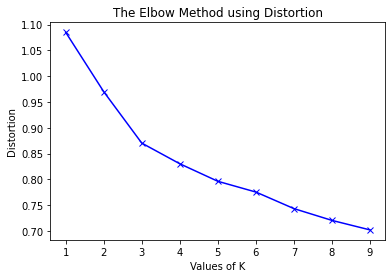

In [19]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

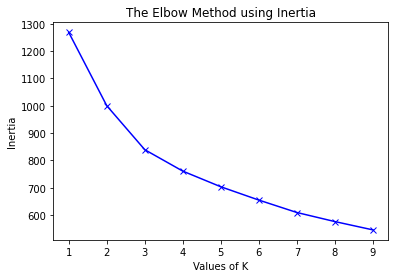

In [20]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

StandardScaler

In [0]:
#@title
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler()
stscaler.fit(dataset)
dataset_ss = stscaler.transform(dataset)

In [0]:
#@title
distortions = [] 
inertias = [] 
K = range(1,10) 

for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(dataset_ss) 
    kmeanModel.fit(dataset_ss)     
      
    distortions.append(sum(np.min(cdist(dataset_ss, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / dataset_ss.shape[0]) 
    inertias.append(kmeanModel.inertia_) 

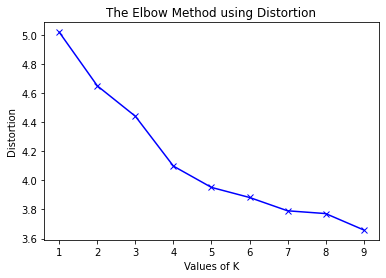

In [23]:
#@title
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

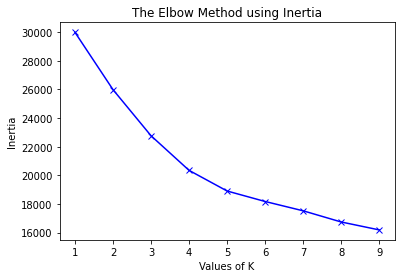

In [24]:
#@title
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

Normalizer

In [0]:
#@title
from sklearn.preprocessing import Normalizer
Normscaler = Normalizer()
Normscaler.fit(dataset)
dataset_norm = Normscaler.transform(dataset)

In [0]:
#@title
distortions = [] 
inertias = [] 
K = range(1,10) 

for k in K:
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(dataset_norm) 
    kmeanModel.fit(dataset_norm)     
      
    distortions.append(sum(np.min(cdist(dataset_norm, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / dataset_norm.shape[0]) 
    inertias.append(kmeanModel.inertia_) 

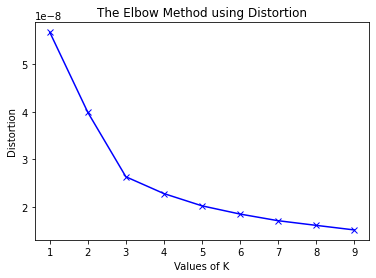

In [27]:
#@title
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

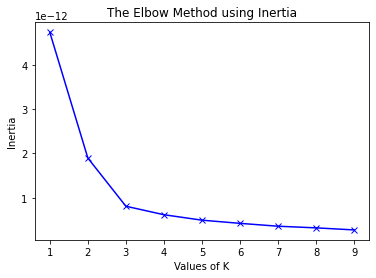

In [28]:
#@title
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

### **Clustering with optimal value k =3 with MinMaxScaled Data**

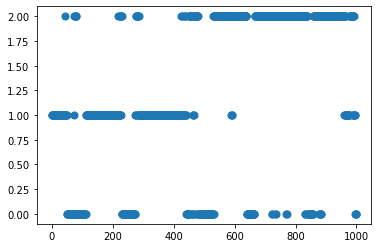

In [29]:
kmeanModel = KMeans(n_clusters=3).fit(dataset_mm) 
y_kmeans = kmeanModel.predict(dataset_mm)
dataset_mm = pd.DataFrame(dataset_mm)
dataset_mm['clusters'] = y_kmeans
plt.scatter(dataset_mm.index, dataset_mm['clusters'], s=50, cmap='viridis')

Saving MinMaxScaled dataset with 3 clusters

In [0]:
dataset_mm.to_csv(r'/content/gdrive/My Drive/Visualization/Home B - 2014/dataset_mm.csv')

**Random Sampling and saving data in CSV (25%)**

In [0]:
dataset_random = dataset_mm.sample(frac=0.25)
dataset_random.to_csv(r'/content/gdrive/My Drive/Visualization/Home B - 2014/dataset_random.csv')

**Stratified Sampling and saving data in CSV(25%)**

In [0]:
from sklearn.model_selection import train_test_split
y = dataset_mm['clusters']
dataset_strata, dataset_rest = train_test_split(dataset_mm, test_size = 0.75, stratify=y)

In [0]:
dataset_strata.to_csv(r'/content/gdrive/My Drive/Visualization/Home B - 2014/dataset_strata.csv')

**Counts of Clusters data points before and after stratified sampling**

In [34]:
dataset_mm['clusters'].value_counts()

2    430
1    343
0    227
Name: clusters, dtype: int64

In [0]:
dataset_strata['clusters'].value_counts()

2    100
1     92
0     58
Name: clusters, dtype: int64

In [0]:
#@title
    df_mm = pd.read_csv('/content/gdrive/My Drive/Visualization/Home B - 2014/dataset_mm.csv')
    df_random = pd.read_csv('/content/gdrive/My Drive/Visualization/Home B - 2014/dataset_random.csv')
    df_strata = pd.read_csv('/content/gdrive/My Drive/Visualization/Home B - 2014/dataset_strata.csv')

In [0]:
#@title
def remove_extra_cols(dataset):

    dataset = dataset.drop(columns = 'clusters') 
    dataset = dataset.drop(columns = 'Unnamed: 0')
    
    return dataset
df_mm   =   remove_extra_cols(df_mm)
df_random   =   remove_extra_cols(df_random)
df_strata   =   remove_extra_cols(df_strata)

In [0]:
#@title
from sklearn.decomposition import PCA
import pandas as pd

def pca(dataset):
  
    pca = PCA(n_components=29)
    pcomponent = pca.fit_transform(dataset)
    exp_var = pca.explained_variance_ratio_
    cum_exp_var = np.cumsum(pca.explained_variance_ratio_)
    principalDf = pd.DataFrame(pcomponent)
    pcomponent = np.transpose(principalDf).values.tolist()

    return pcomponent,exp_var.tolist(), cum_exp_var.tolist(),pca

In [0]:
#@title
pcomponent_mm,exp_var_mm,cum_exp_var_mm,pca_mm = pca(df_mm)
pcomponent_random,exp_var_random,cum_exp_var_random,pca_random = pca(df_random)
pcomponent_strata,exp_var_strata,cum_exp_var_strata,pca_strata = pca(df_strata)

In [0]:
#@title
colnames = list(dataset.columns)

In [0]:
#@title
def task2_top3attr(pca,colnames):

  loadings = pca.components_.T*np.sqrt(pca.explained_variance_)
  df_loading  = pd.DataFrame(loadings,index=colnames)
  #df_loading.head()
  df_loading["sum_loadings"]= np.sum(df_loading.iloc[:,0:6],axis=1)
  df_loading = df_loading.sort_values(by = ["sum_loadings"],ascending= False)
  return list(df_loading.index[0:3])


In [0]:
#@title
top3_attr_mm =  task2_top3attr(pca_mm,colnames)
top3_attr_random = task2_top3attr(pca_random,colnames)
top3_attr_strata  = task2_top3attr(pca_strata,colnames)

In [0]:
#@title
top3_attr_strata

['precipProbability', 'dewPoint', 'temperature']

In [0]:
#@title
top3_attr_mm

['dewPoint', 'temperature', 'precipProbability']

In [0]:
#@title
top3_attr_random

['precipProbability', 'humidity', 'dewPoint']

In [0]:
#@title
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances

In [0]:
#@title
def get_MDS_data(dataset,metric_type):

  mds = MDS(n_components  = 2,dissimilarity  = 'precomputed')
  distance_matrix = pairwise_distances(dataset,metric = metric_type)
  mds_trans = mds.fit_transform(distance_matrix)
  
  return  mds_trans.tolist()

In [0]:
#@title
mds_euclidean = get_MDS_data(df_mm,'euclidean')
mds_correlation = get_MDS_data(df_mm,'correlation')

In [0]:
#@title
top3_attr_mm

['dewPoint', 'temperature', 'precipProbability']

In [0]:
#@title
def get_top3_pca_atttr_data(dataset,colnames,top3_attr):
  
  data = []
  indexs = [colnames.index(x) for x in  top3_attr]
  [data.append(dataset[str(i)]) for i in indexs]
  data = np.transpose(data).tolist()
  return data

In [0]:
#@title
top3_attr_data_mm  = get_top3_pca_atttr_data(df_mm,colnames,top3_attr_mm)
# top3_attr_data_random  = get_top3_pca_atttr_data(df_random,colnames,top3_attr_random)
# top3_attr_data_strata  = get_top3_pca_atttr_data(df_strata,colnames,top3_attr_strata)

In [0]:
#@title
data_new  = []
for i in range(len(top3_attr_data_mm)):
  data_new.append({top3_attr_mm[0]: top3_attr_data_mm[i][0],top3_attr_mm[1]: top3_attr_data_mm[i][1],top3_attr_mm[2]: top3_attr_data_mm[i][2]})

In [0]:
#@title
data_new